# Vertical transmission: Efast sensitivity analysis

In [1]:
from SALib.sample import saltelli, fast_sampler
import pandas as pd
from Sensitivity import Sensitivity
import joblib

model_path = "../models/BMI-SNP/"
output_path = "../output/data/"
plots_path = "../output/plots/"

In [2]:
# parameter dictionary
problem = {
    'num_vars': 3,
    'names': ['random-mating', 'leakage', 'fertility-differential'],
    'bounds': [[0, 1.0],
               [0, 0.50],
               [0, 0.30]]
}

In [3]:
sample_parameters = False
if (sample_parameters):
    param_values = fast_sampler.sample(problem, 2000)
    t = pd.DataFrame(param_values)
    t.columns = ['random-mating', 'leakage', 'fertility-differential']
    t.to_csv(model_path + "data/param-vt-efast.csv", index=False)
else:
    t = pd.read_csv(model_path + "data/param-vt-efast.csv")
t.shape

(6000, 3)

In [4]:
# process results
df = pd.read_csv(output_path + "results-vt-efast.csv", sep = ";")
cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)
colnames = ['g'+str(i+1) for i in range(4)]
cols.columns = colnames
cols = cols[colnames].apply(pd.to_numeric)
df = pd.concat([df, cols], axis=1, ignore_index=False)
params = pd.read_csv(output_path + "param-vt-efast.csv", sep = ";")
df = df.merge(params, on = ["iteration", "replicate"])
df = df.sort_values(by=['iteration'])
df = df.loc[df["iteration"] <= len(t),:]

# select parameters
vars = ['p_fertility_factor', 'p_random_mating', 'p_leakage']
X = df.loc[:,vars]

/var/folders/36/wsfqn0_j2ng6r0b58wc559fc0000gn/T/ipykernel_7892/685243416.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)


In [5]:
X.describe()

,p_fertility_factor,p_random_mating,p_leakage
count,6000.000000,6000.000000,6000.000000
mean,0.150000,0.500000,0.250000
std,0.086610,0.288699,0.144350
min,0.000049,0.000162,0.000081
25%,0.075024,0.250081,0.125040
50%,0.150000,0.500000,0.250000
75%,0.224976,0.749919,0.374960
max,0.299951,0.999838,0.499919


## Proportion obese

                              S1        ST   S1_conf   ST_conf
random-mating           0.022033  0.341896  0.003966  0.017989
leakage                 0.464245  0.887091  0.003529  0.018373
fertility-differential  0.047965  0.441132  0.003434  0.019079


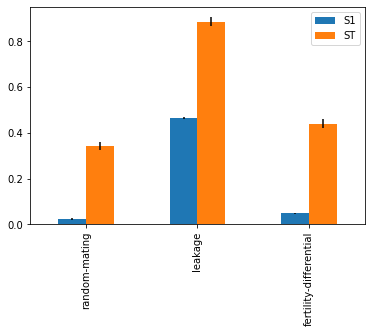

In [6]:
ef = Sensitivity(problem, df['g4'], X)
ef.score('efast')
ef.plot(save=True, filepath= plots_path + 'vt-efast-prop-obese.pdf',
    move=True, moving_path= '../manuscript/plots/')
ef.plot3D(labels={'outcome':'obese', 'y':'random mating', 'x':'fertility', 'z':'leakage'})

sav = {
    'ef_obese_s1': ef.tabval('S1'),
    'ef_obese_st': ef.tabval('ST')
}

## Averarage BMI

                              S1        ST   S1_conf   ST_conf
random-mating           0.033189  0.272037  0.004405  0.015979
leakage                 0.533368  0.830951  0.004422  0.019550
fertility-differential  0.105773  0.378694  0.004228  0.020512


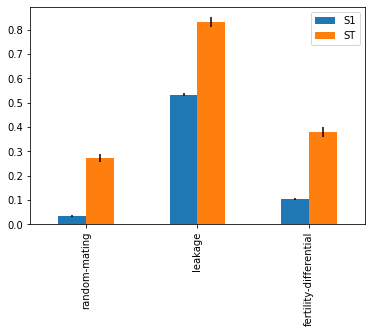

In [7]:
ef = Sensitivity(problem, df['average_bmi'], X)
ef.score('efast')
ef.plot(save=True, filepath= plots_path + 'vt-efast-average-bmi.pdf',
    move=True, moving_path= '../manuscript/plots/')
ef.plot3D(labels={'outcome':'average bmi', 'y':'random mating', 'x':'fertility', 'z':'leakage'})

sav['ef_average_s1'] = ef.tabval('S1')
sav['ef_average_st'] = ef.tabval('ST')


## SD BMI

                              S1        ST   S1_conf   ST_conf
random-mating           0.002972  0.357627  0.003774  0.015741
leakage                 0.395715  0.841936  0.003690  0.017513
fertility-differential  0.096874  0.519739  0.003928  0.018458


['efast-vt.pkl']

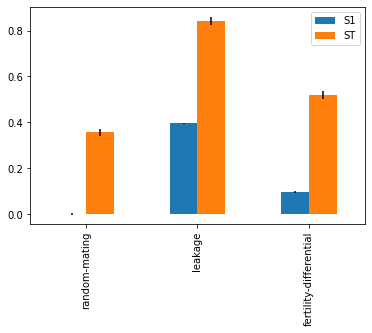

In [8]:
ef = Sensitivity(problem, df['sd_bmi'], X)
ef.score('efast')
ef.plot(save=True, filepath= plots_path + 'vt-efast-sd-bmi.pdf',
    move=True, moving_path= '../manuscript/plots/')
ef.plot3D(labels={'outcome':'sd bmi', 'y':'random mating', 'x':'fertility', 'z':'leakage'})

sav['ef_sd_s1'] = ef.tabval('S1')
sav['ef_sd_st'] = ef.tabval('ST')

# save output
v = ef.createRows(sav)
joblib.dump(v, 'efast-vt.pkl')
